# Identification

Student names and matriculation numbers

*Add here*

We declare that the code and analyses contained in this notebook were produced by ourselves and therefore were not copied from elsewhere.

---
# Notes
---
When a code cell has the text `Your code here`, feel free to split it into more cells (code and/or markdown), if it is more convenient for you.


---
# Preprocessing
---

**TO-DO P1**

In [1]:
# Library imports

# Your code here

In [2]:
# Data imports
# Data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data visualization
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots

sns.set_style(style='darkgrid')

df = pd.read_csv('covid-data.csv')


**TO-DO P2**

In [2]:
# Understanding the data

# FILL MARKDOWN CELL BELOW


In [3]:
print(df.info())
print(df.loc[df["location"] == "Europe"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220336 entries, 0 to 220335
Data columns (total 32 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Unnamed: 0                             220336 non-null  int64  
 1   continent                              207663 non-null  object 
 2   location                               220336 non-null  object 
 3   date                                   220336 non-null  object 
 4   new_cases                              211112 non-null  float64
 5   new_deaths                             192215 non-null  float64
 6   reproduction_rate                      166135 non-null  float64
 7   icu_patients                           28050 non-null   float64
 8   hosp_patients                          30819 non-null   float64
 9   weekly_icu_admissions                  7125 non-null    float64
 10  weekly_hosp_admissions_per_million     14188 non-null   

* * * * * * * * * * * * * * * * * *
Your analysis documentation here
* * * * * * * * * * * * * * * * * *

**TO-DO P3**

In [4]:
# Ensure the date column is datetime


# Your code here

df["date"] = pd.to_datetime(df["date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220336 entries, 0 to 220335
Data columns (total 32 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   Unnamed: 0                             220336 non-null  int64         
 1   continent                              207663 non-null  object        
 2   location                               220336 non-null  object        
 3   date                                   220336 non-null  datetime64[ns]
 4   new_cases                              211112 non-null  float64       
 5   new_deaths                             192215 non-null  float64       
 6   reproduction_rate                      166135 non-null  float64       
 7   icu_patients                           28050 non-null   float64       
 8   hosp_patients                          30819 non-null   float64       
 9   weekly_icu_admissions                  7125 non-

---
# Analysis
---

**TO-DO A1**

Document what is happening in the `location` column
  
Your analysis here

R:Existem registos em que a location é um continente ex:"Europe" e Continente Nan. Portanto não são da mesma categoria

**TO-DO A2**

Your answer here  

R: Como existem registos em que o Continente é Nan, ao fazermos um estudo a nivel de um país esses registos não nos são uteis.
 Outro problema ao fazermos um histograma utilizando a coluna location inicialmente estaremos à espera de termos nesse field
 apenas paises mas no entanto vão aparecer continentes. Se quisermos fazer um estudo global não somos capazes de averiguar se
 um registo que tenha a location e continent corretas, não tenha "contribuido" para esses registos que têm um continente
 no field da location. Tambem não é possivel fazer a distinção entre região economica Europeia e o Continente Europa com estes
 registos.

**TO-DO A3**

In [5]:
# create dfx dataframe with data for Austria, France, Spain and Portugal only

# Your code here

df_austria = df.loc[df["location"] == "Austria"]
df_france = df.loc[df["location"] == "France"]
df_spain = df.loc[df["location"] == "Spain"]
df_portugal = df.loc[df["location"] == "Portugal"]


**TO-DO A4**

In [20]:
# create function to produce and export histogram and boxplot.

# follow the instructions provided in the handout
# remember you will revise/expand this function later

# Your code here

def get_basic_plots(country, var, opt):
    df_y = df.loc[df["location"] == country]
    df_y.hist(column=var, bins=20)
    plt.savefig(f"{country}-{var}-histogram.png")
    plt.close()
    
    df_y = df.loc[df["location"] == country]
    df_y.boxplot(column=var)
    plt.savefig(f"{country}-{var}-boxplot.png")
    plt.close()
    
    
get_basic_plots("Portugal", "new_cases", 0)
    

**TO-DO A5**

979.0
2447.5


TypeError: Axes.boxplot() got an unexpected keyword argument 'fliersize'

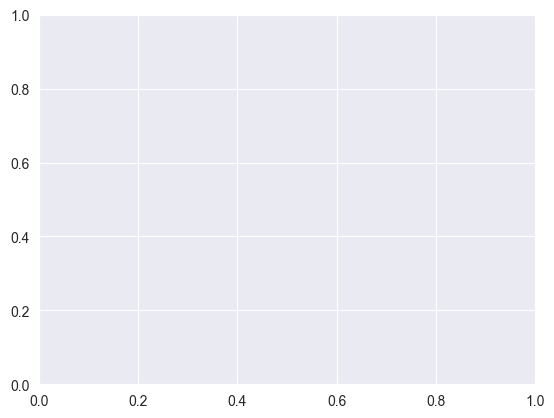

In [12]:
# create function to remove outliers using the 1.5*IQR method 

# Your code here

def remove_outliers(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    print(iqr)
    to_low  = q1-1.5*iqr
    to_high = q3+1.5*iqr
    print(to_high)
    df_out = df_in.loc[(df_in[col_name] > to_low) & (df_in[col_name] < to_high)]
       
    #testing_box_plot
    df_y = df_out.loc[df_out["location"] == "Portugal"]
    df_y.boxplot(column="new_cases", fliersize=0)
    #a razão pela qual mostra outliers na imagem é porque estamos a gerar um novo graph em que para aqueles percentiles
    #existem novos valores para outliers
    
    return df_out
    
remove_outliers(df, "new_cases")

**TO-DO A6**

In [8]:
# edit function created in A4 so that the argument opt is used to remove outliers (or not)
# following instructions in the handout. Edit your code in the TO-DO A4 cell

def get_basic_plots(country, var, opt):
    if ops == False:
        df_y = df.loc[df["location"] == country]
        df_y.hist(column=var, bins=20)
        plt.savefig(f"{country}-{var}-histogram.png")
        plt.close()
    
        df_y = df.loc[df["location"] == country]
        df_y.boxplot(column=var)
        plt.savefig(f"{country}-{var}-boxplot.png")
        plt.close()
    else:
        fixed.boxplot(x= remove_outliers(df_xlast6months_country,var)[var])
        df_y = df.loc[df["location"] == country]
        df_y.hist(column=var, bins=20)
        plt.savefig(f"{country}-{var}-histogram.png")
        plt.close()
    
        df_y = df.loc[df["location"] == country]
        df_y.boxplot(column=var)
        plt.savefig(f"{country}-{var}-boxplot.png")
        plt.close()

**TO-DO A7**

Your analysis here 

**TO-DO A8**

In [13]:
# adding extra columns to the dataframe with normalised data for new_cases and new_deaths

# Your code here



Your analysis here